<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитаем данные

In [499]:
hh_data_original = pd.read_csv('hh_database.csv', delimiter=';')
hh_data = hh_data_original.copy()

2. Выведем несколько первых и последних строк таблицы и убедимся в том, что данные не повреждены

In [500]:
display(hh_data.head())
display(hh_data.tail())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведем основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [501]:
# информация о структуре таблицы
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+


Видим, что у в нашей таблице 44744 строки, 12 признаков. \
Все признаки типа объект, даже те, которые по смыслу должны быть числовыми (например, заработная плата). \
Есть несколько признаков с пропущенными значениями ('Опыт работы', 'Последнее/нынешнее место работы' и 'Последняя/нынешняя должность').

________________________________________________________________________________________________________________

4. Проверим число пустых значений

In [502]:
# колонки с % содержащихся в них пропусков
cols_null_percent = hh_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64

Существенное количество пропусков наблюдаем только в колонке 'Опыт работы'

___________________________________________________________________________

5. Выведем основную статистическую информацию о столбцах


In [503]:
display(hh_data.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


Т.к. все данные до преобразования имеют тип объект, мы можем проанализировать только количество уникальных и наиболее часто встречающиеся значения. \
Например, видим, что подавляющее большинство кандидатов не указало информацию о наличии автомобиля. Неизвестно, означает ли это его отсутствие. Также большинство ищет работу с полной занятостью. \
Хотя для некоторых колонок даже эта информация не имеет смысла до преобразования, т.к. значения слишком уникальны (например, в колонке 'Опыт работы' или 'Образование и ВУЗ').

________________________________________________________________________________________________________________

# Преобразование данных

1. Начнем с признака **"Образование и ВУЗ"**. Его текущий формат: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…

    Оставим информацию только об уровне образования.

In [504]:
# создадим признак "Образование" и удалим "Образование и ВУЗ"
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: re.match(r'.*?образование', x)[0])
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)
display(hh_data['Образование'].value_counts())
display(hh_data['Образование'].value_counts(normalize=True))

Высшее образование                 33863
Среднее специальное образование     5765
Неоконченное высшее образование     4557
Среднее образование                  559
Name: Образование, dtype: int64

Высшее образование                 0.756817
Среднее специальное образование    0.128844
Неоконченное высшее образование    0.101846
Среднее образование                0.012493
Name: Образование, dtype: float64

Большинство кандидатов (76%) имеют высшее образование

________________________________________________________________________________________________________________

2. Преобразуем столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

    Создадим два новых признака **"Пол"** и **"Возраст"**. 

In [505]:
# создадим признаки "Пол" и "Возраст" и удалим "Пол, возраст"
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: re.match(r'\w*\s?,', x)[0][0])
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: int(re.match(r'\d*\s{1}', x[11:])[0]))
hh_data = hh_data.drop('Пол, возраст', axis=1)
print(hh_data['Пол'].value_counts(normalize=True))
print(f'Возраст в диапазоне от {hh_data["Возраст"].min()} до {hh_data["Возраст"].max()}')
print(f'Средний возраст: {hh_data["Возраст"].mean().round(2)}')

М    0.809293
Ж    0.190707
Name: Пол, dtype: float64
Возраст в диапазоне от 14 до 100
Средний возраст: 32.2


Подавляющее число кандидатов являются мужчинами (81%). Возможно, это связано с тем, что женщины могут находиться в декрете, либо быть домохозяйками. Также можно предположить, что женщины реже меняют работу.

Средний возраст кандидатов - 32 года.

________________________________________________________________________________________________________________

3. Преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

    Выделим общий опыт работы соискателя в месяцах

In [506]:
# создадим признак "Опыт работы (месяц)" и удалим "Опыт работы"

def get_work_experience(experience_str):
    """
    Функция получает числовое значение опыта работы в месяцах из строки

    Args:
        experience_str (str): Строка с описанием опыта работы

    Returns:
        int: Возвращается количество месяцев
    """
    if experience_str is np.NaN or experience_str == 'Не указано':
        return np.NaN
    words = experience_str.split()[2:]
    experience = 0
    if words[1][:3] in ['год', 'лет']:
        experience += int(words[0]) * 12
        words = words[2:]
    if words[1][:5] == 'месяц':
        experience += int(words[0])
    return experience
          
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_work_experience)
hh_data = hh_data.drop('Опыт работы', axis=1)
print(f'Опыт работы в диапазоне {hh_data["Опыт работы (месяц)"].min()} до {hh_data["Опыт работы (месяц)"].max()}')
print(f'Медианный опыт работы: {hh_data["Опыт работы (месяц)"].median()}')

Опыт работы в диапазоне 1.0 до 1188.0
Медианный опыт работы: 100.0


Видим, что опыт работы у некоторых кандидатов достигает 1188 месяцев (99 лет). Это похоже на ошибку.

Также в данных об опыте есть пропуски. Неизвестно, означает ли это отсутствие опыта.

________________________________________________________________________________________________________________

4. Преобразуем признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. Можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. 


In [507]:
# создадим признаки "Город", 'Готовность к переезду', 'Готовность к командировкам' и удалим "Город, переезд, командировки"

def get_city(location_params_str):
    "Функция получает город/группу городов в требуемом формате"
    
    phrases = location_params_str.split(',')
    city = phrases[0][:-1]
    million_cities = [
        'Новосибирск',
        'Екатеринбург',
        'Нижний Новгород',
        'Казань',
        'Челябинск',
        'Омск',
        'Самара',
        'Ростов-на-Дону',
        'Уфа',
        'Красноярск',
        'Пермь',
        'Воронеж',
        'Волгоград'
    ]
    if city in million_cities:
        return 'город-миллионник'
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    return 'другие'

def get_relocation(location_params_str):
    "Функция получает признак готовности к переезду"
    
    phrases = location_params_str.split(',')
    relocation = False
    for phrase in phrases:
        if 'перее' in phrase:
            relocation = ' не ' not in phrase
    return relocation

def get_business_trip(location_params_str):
    "Функция получает признак готовности к командировкам"
    
    phrases = location_params_str.split(',')
    business_trip = False
    for phrase in phrases:
        if 'командировка' in phrase:
            business_trip = ' не ' not in phrase
    return business_trip
         
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_relocation)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_business_trip)
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)
print(f'Города кандидатов: \n{hh_data["Город"].value_counts(normalize=True)}\n')
print(f'Готовность к переезду: \n{hh_data["Готовность к переезду"].value_counts(normalize=True)}\n')
print(f'Готовность к командировкам: \n{hh_data["Готовность к командировкам"].value_counts(normalize=True)}')

relocation_and_trip_mask = (hh_data['Готовность к командировкам'] == True) & (hh_data['Готовность к переезду'] == True)
relocation_and_trip = hh_data[relocation_and_trip_mask].shape[0]
print(f'\nГотовы одновременно и к командировкам, и к переезду: {round(relocation_and_trip * 100/hh_data.shape[0], 2)}')

Города кандидатов: 
Москва              0.371469
другие              0.354327
город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: Город, dtype: float64

Готовность к переезду: 
False    0.641851
True     0.358149
Name: Готовность к переезду, dtype: float64

Готовность к командировкам: 
True     0.707134
False    0.292866
Name: Готовность к командировкам, dtype: float64

Готовы одновременно и к командировкам, и к переезду: 31.87


Большинство кандидатов готовы к периодическим командировкам (71%). 

Большинство не готовы к переезду (64%). Вероятно это связано с тем, что средний возраст составляет 32 года, к этому возрасту у многих уже есть семьи, переезд в таком случае дается сложнее.

Но есть те, кто готов и к тому, и другому (32%).

73% резюме размещено в Москве и городах, не являющихся миллионниками.

________________________________________________________________________________________________________________


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Cоздадим признаки-мигалки для каждой категории.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

In [508]:
# создадим признаки для каждого вида занятости и каждого графика работы, удалим признаки 'График', 'Занятость'

employment_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
print('Занятость:')
for employment in employment_list:
    hh_data[employment] = hh_data['Занятость'].apply(lambda x: True if employment in x else False)
    print(f'{employment}: {hh_data[employment].sum()} ({round(hh_data[employment].mean()*100)}%)')
    
schedule_list = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
print('\nГрафик работы:')
for schedule in schedule_list:
    hh_data[schedule] = hh_data['График'].apply(lambda x: True if schedule in x else False)
    print(f'{schedule}: {hh_data[schedule].sum()} ({round(hh_data[schedule].mean()*100)}%)')
    
hh_data = hh_data.drop(['График', 'Занятость'], axis=1)

print(f'Ищут проектную работу и волонтерство: {hh_data[(hh_data["проектная работа"]==True) & (hh_data["волонтерство"]==True)].shape[0]}')
print(f'Ищут вахтовый метод и гибкий график: {hh_data[(hh_data["вахтовый метод"]==True) & (hh_data["гибкий график"]==True)].shape[0]}')

Занятость:
полная занятость: 43284 (97%)
частичная занятость: 13136 (29%)
проектная работа: 8068 (18%)
волонтерство: 486 (1%)
стажировка: 2804 (6%)

График работы:
полный день: 41716 (93%)
сменный график: 12725 (28%)
гибкий график: 15584 (35%)
удаленная работа: 15022 (34%)
вахтовый метод: 3084 (7%)
Ищут проектную работу и волонтерство: 436
Ищут вахтовый метод и гибкий график: 2311


Почти все кандидаты готовы работать на полной занятости. Около трети кандидатов готовы к частичной занятости. Остальные виды занятости гораздо менее популярны.

Соответственно почти все кандидаты (93%) указали полный день в качестве графика работы. Также треть кандидатов хочет работать удаленно.

________________________________________________________________________________________________________________

6. (2 балла) Преобразуем признак заработной платы **"ЗП"**. 
Помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. 

Дату, по которой определяется курс, возьмем из признака **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. 

Создадим признак "ЗП (руб)".

In [509]:
# создадим признак "ЗП (руб)" и удалим "ЗП"
currency_mapping = {
    'руб.': 'RUB',
    'бел.руб.': 'BYN',
    'KZT': 'KZT',
    'EUR': 'EUR',
    'USD': 'USD',
    'грн.': 'UAH',
    'сум': 'UZS',
    'KGS': 'KGS',
    'AZN': 'AZN'
}
exchange_rates = pd.read_csv('ExchangeRates.csv')
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date
exchange_rates['date'] = pd.to_datetime(exchange_rates['date']).dt.date
hh_data['Валюта'] = hh_data['ЗП'].apply(lambda x: currency_mapping[x.split()[1]])
hh_data = hh_data.merge(exchange_rates, how='left', left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'])
hh_data = hh_data.fillna({'close': 1, 'proportion': 1})
hh_data['ЗП (руб)'] = hh_data['ЗП'].apply(lambda x: int(x.split()[0]))
hh_data['ЗП (руб)'] = hh_data['ЗП (руб)'] * hh_data['close']/hh_data['proportion']
hh_data = hh_data.drop(exchange_rates.columns, axis=1)
hh_data = hh_data.drop(['ЗП', 'Валюта'], axis=1)

print(f'Медианная желаемая заработная плата: {hh_data["ЗП (руб)"].median()}')


Медианная желаемая заработная плата: 59019.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

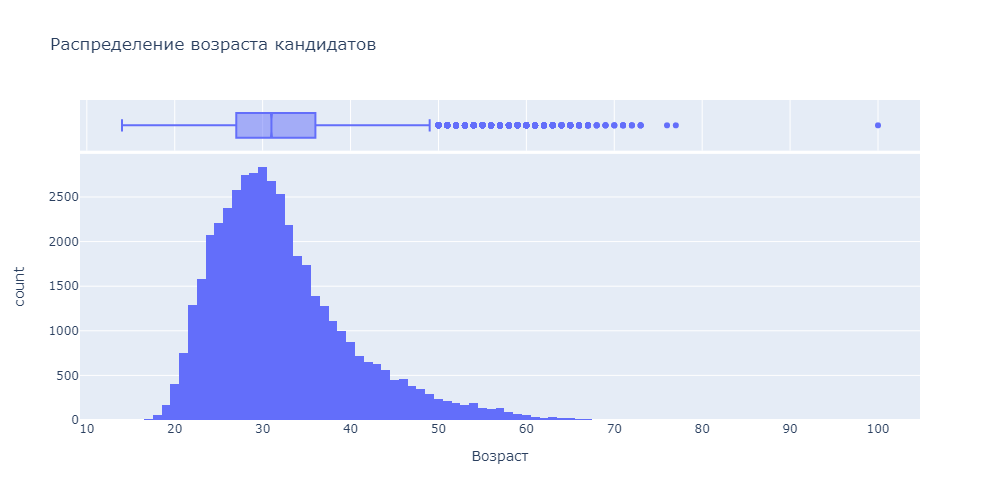

Показатель ассиметрии: 1.13


In [510]:
# построим гистограмму распределения возраста кандидатов
fig = px.histogram(
    data_frame=hh_data,
    x='Возраст',
    title='Распределение возраста кандидатов',
    nbins=90,
    marginal='box',
    width=1000,
)
fig.show("png")

# расчитаем показатель ассиметрии распределения возраста кандидатов
print(f'Показатель ассиметрии: {hh_data["Возраст"].skew().round(2)}')

Распределение возраста похоже на нормальное с правосторонней ассиметрией (показатель 1.13).

Медианное значение возраста кандидатов - 31 год. Мода - 30 лет. Возраст более, чем 50% кандидатов находится в интервале от 27 до 36 лет.

Минимальный возраст кандидатов - 14 лет. Кандидаты старше 50 лет помечены на графике как выбросы. Стоит проанализировать количество таких кандидатов и, возможно, смягчить границу для определения выбросов, т.к. 50-60 лет - это еще трудоспособный возраст.

Есть 100-летний кандидат. Возможно, это ошибка в данных.

________________________________________________________________________________________________________________

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

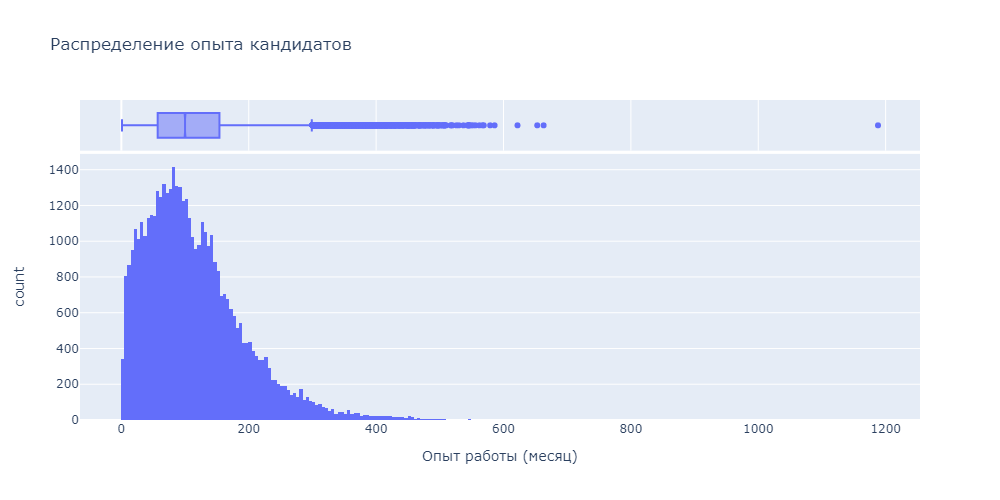

Показатель ассиметрии: 1.28


In [512]:
# построим гистограмму распределения опыта кандидатов
fig = px.histogram(
    data_frame=hh_data,
    x='Опыт работы (месяц)',
    title='Распределение опыта кандидатов',
    marginal='box',
    width=1000
)
fig.show('png')

# расчитаем показатель ассиметрии распределения опыта кандидатов
print(f'Показатель ассиметрии: {hh_data["Опыт работы (месяц)"].skew().round(2)}')

Распределение опыта похоже на нормальное с правосторонней ассиметрией (показатель 1.28).

Медианное значение - 100 месяцев (8 лет). Мода - 81 месяц (около 7 лет). Более 50% кандидатов имеют опыт от 57 до 154 месяцев (5 - 13 лет).

Кандидаты с опытом более, чем 300 месяцев (25 лет) помечены на графике как выбросы. Однако, даже если человек проработал с окончания университета до пенсии, то возможен опыт в 40 лет. А некоторые начинают работать гораздо раньше и заканчивают после выхода на пенсию. Стоит смягчить границу для определения выбросов.

Как мы уже видели раньше, есть кандидат с опытом в 99 лет, что, скорее всего, является ошибкой. Также есть кандидаты с опытом до 54 лет. Тут стоит сопоставить возраст кандидатов с их опытом и удостовериться, что это не ошибка.

________________________________________________________________________________________________________________

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


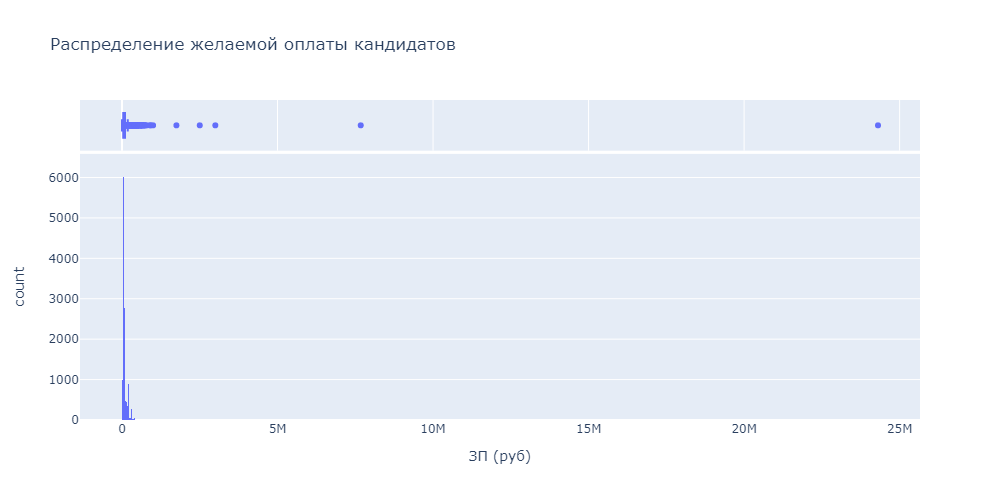

In [513]:
# построим гистограмму распределения заработной платы, на которую претендуют кандидаты
fig = px.histogram(
    data_frame=hh_data,
    x='ЗП (руб)',
    title='Распределение желаемой оплаты кандидатов',
    marginal='box',
    nbins=3000,
    width=1000
)
fig.show('png')

График трудночитаем, т.к. есть подозрительные значения в 7.7 и 24 миллиона рублей. Скорее всего, это ошибки. Возможно, проблема в указанной валюте. Также есть еще 3 значения больше 1 млн.рублей.

Проверим, много ли значений > 600000

In [514]:
hh_data[hh_data['ЗП (руб)'] >= 600000].shape

(24, 23)

Всего 24 значения, обрежем график для читабельности.

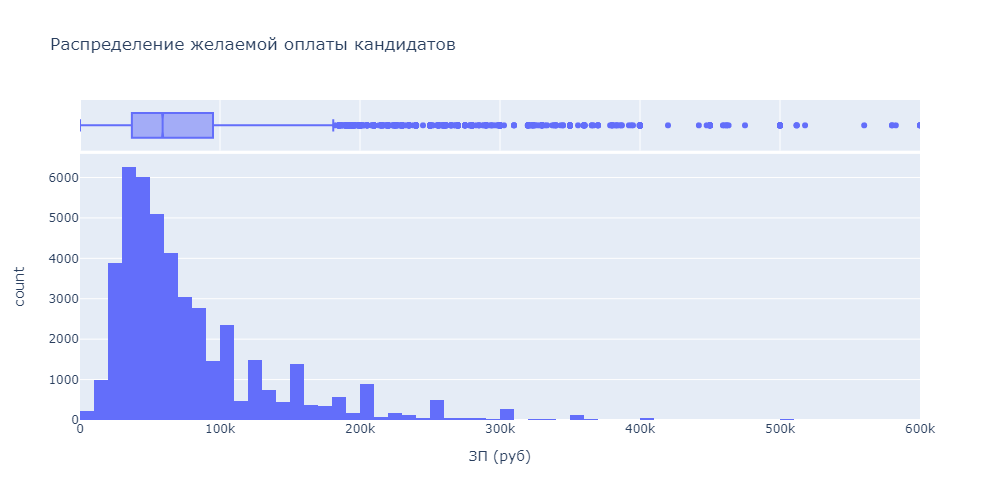

In [515]:
fig.update_xaxes(range=[0, 600000])
fig.show('png')

График имеет несколько всплесков, которые чередуются с более низкими значения. Это связано с тем, что кандидаты чаще указывают круглые суммы (кратные 50).
 
Медианное значение желаемой зарплаты - 59 тыс.рублей. Мода - 50 тысяч.
Основная масса кандидатов желает получать зарплату в интервале 20 - 110 тысяч рублей. Более 50% кандидатов желают зарплату от 37 до 95 тысяч.

Желаемая зарплата более, чем 180 тысяч помечена на графике как выбросы. Однако таких выбросов слишком много. Кажется, что в городах-миллионниках кандидаты вполне могут стремиться к заработной плате в 200-300 тысяч рублей. Стоит смягчить границу для определения выбросов.

________________________________________________________________________________________________________________

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

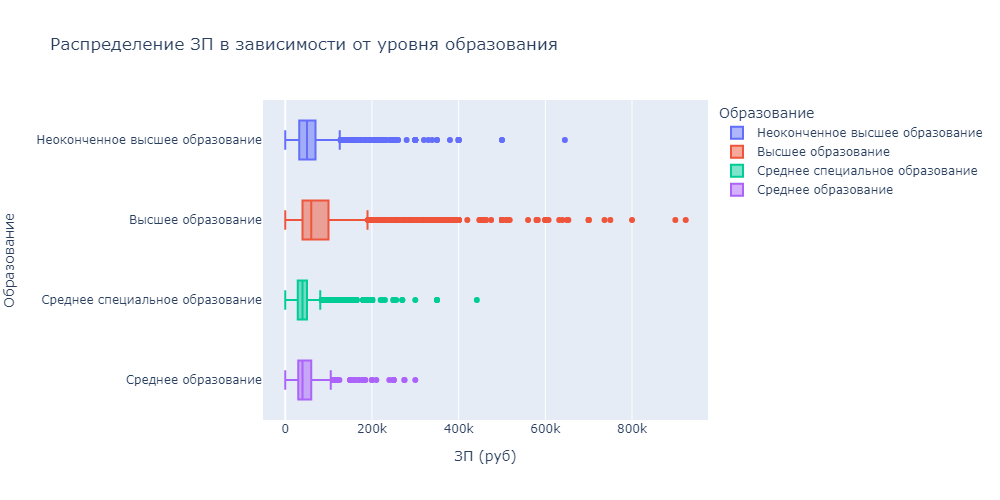

In [516]:
# построим коробчатую диаграмму для анализа распределения ЗП в зависимости от уровня образования
fig = px.box(
    data_frame=hh_data[hh_data['ЗП (руб)'] < 1000000],
    x='ЗП (руб)',
    y='Образование',
    title='Распределение ЗП в зависимости от уровня образования',
    color='Образование',
    height=500,
    width=1000
)
fig.show('png')

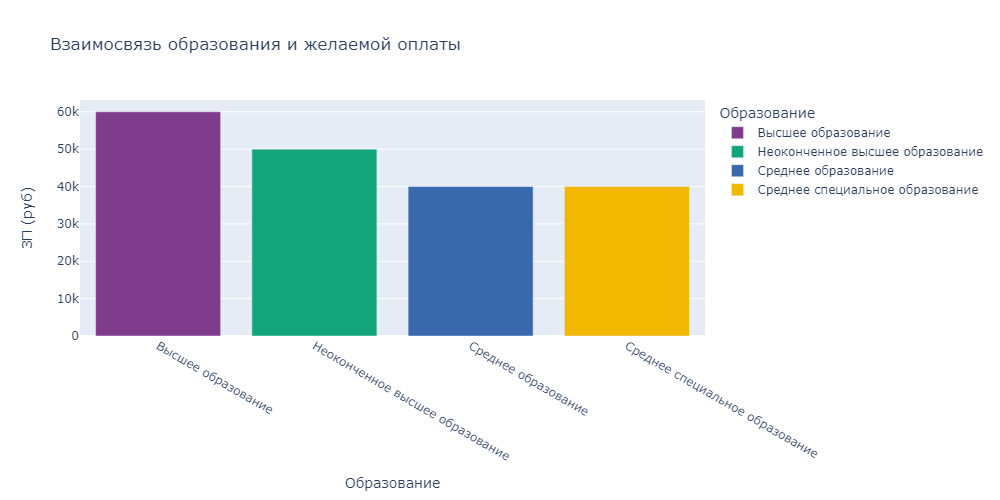

In [517]:
# построим столбчатую диаграмму для анализа взаимосвязи ЗП и уровня образования
education_data = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby('Образование', as_index=False)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=education_data,
    x='Образование',
    y='ЗП (руб)',
    title='Взаимосвязь образования и желаемой оплаты',
    color='Образование',
    color_discrete_sequence=px.colors.qualitative.Bold,
    width=1000
)
fig.show('png')

Уровень образования коррелирует с уровнем заработной платы, на которую претендует кандидат. Это закономерно, т.к. такие кандидаты успели получить более глубокие знания, которые могут пригодиться на рабочем месте.

Самые высокие запросы у людей с высшим образованием. Также у них самый большой разброс в заработных платах. Более 50% таких соискателей претендуют на суммы от 40 до 100. На графике показано много выбросов. Как уже говорилось ранее, стоит смягчить границу выбросов.\
Медиана у таких кандидатов (60 тыс) в 1.5 раза выше, чем у кандидатов, которые получили среднее/среднеспециальное образование (40 тыс). 

Более 50% людей, получивших среднее образование, претендует на суммы от 29 до 50 тысяч. 
Более 50% людей, получивших среднеспециальное образование, претендует на суммы от 30 до 60 тысяч. Видимо, это связано с тем, что такие кандидаты получили более узкие профессиональные навыки, которые могут пригодиться вработе.

Медианные зарплаты людей с неоконченным высшим образованием - 50 тыс.
Однако среди них есть также кандидаты, претендующие на зарплату в 645 тыс. Возмжно, это выбросы.

Очевидно, признак 'Образование' очень важен при прогнозировании зарплаты.

In [518]:
# проанализируем большие значения ЗП
hh_data_original[hh_data['ЗП (руб)'] > 1000000]

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
6931,"Мужчина , 31 год , родился 31 мая 1987",380000 USD,"Программирование, Разработка или Системный адм...","Алматы , готов к переезду (Россия, Казахстан, ...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...","Опыт работы 9 лет 7 месяцев Программирование,...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,"Высшее образование 2014 Университет «Туран», ...",22.04.2019 14:09,Не указано
28253,"Мужчина , 39 лет , родился 31 мая 1979",3000000 руб.,"Руководитель IT проектов, Роботизация, Автомат...","Москва , м. Щелковская , готов к переезду (Бе...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, вахтовый метод, уд...",Опыт работы 23 года 4 месяца Руководитель IT ...,HAMSTER ROBOTICS,Заместитель директора,Высшее образование 2019 Московский финансово-...,27.04.2019 09:41,Имеется собственный автомобиль
39191,"Мужчина , 29 лет , родился 21 апреля 1990",120000 USD,Специалист по IT,"Актобе , готов к переезду , готов к командировкам",полная занятость,полный день,Опыт работы 8 лет 2 месяца Специалист по IT 1...,"ТОО ""AMS""",Системный администратор,Среднее специальное образование 2009 Экономика...,22.04.2019 15:21,Не указано
41924,"Мужчина , 24 года , родился 27 декабря 1994",1750000 руб.,Project manager,"Москва , м. Киевская , не готов к переезду , ...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы 3 года 3 месяца Project manager 1...,Тинькофф Банк,Технолог автоматизации бизнес-процессов,Неоконченное высшее образование 2020 Московск...,22.04.2019 18:48,Не указано
43134,"Мужчина , 38 лет , родился 10 февраля 1981",2500000 руб.,Chief AI Officer,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 8 лет 1 месяц Chief AI Officer 2 ...,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,Высшее образование (Кандидат наук) 2006 Postgr...,25.10.2018 02:49,Не указано


Суммы более 1 млн.руб указаны в резюме кандидатов из Казахстана, претендующих на должности в IT. Возможно, они указали неверную валюту в резюме (USD вместо руб, например).

Также есть вероятность, что кандидаты с зарплатой выше 1 млн просто указали лишний 0 в сумме. Например, 24-летний project manager скорее мог бы претендовать на сумму в 175 тыс, чем на 1.75 млн.

________________________________________________________________________________________________________________

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

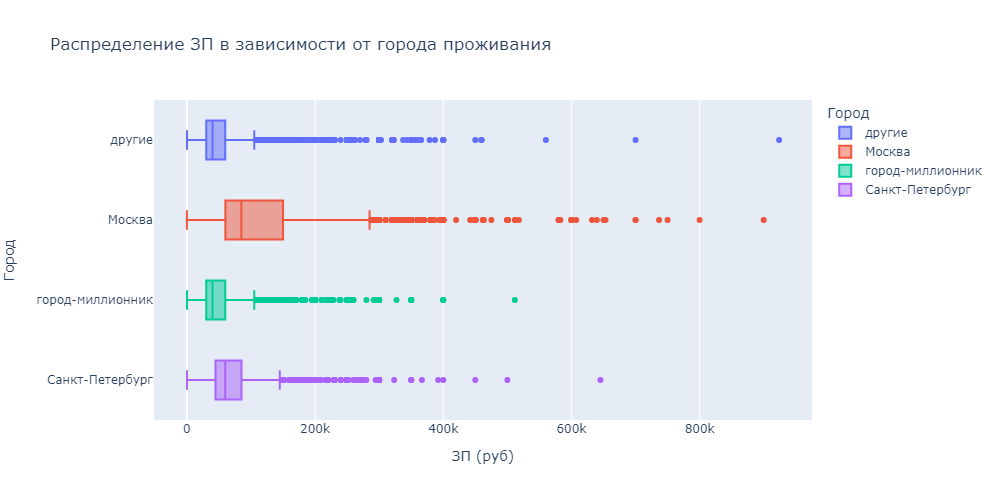

In [519]:
# построим коробчатую диаграмму для анализа распределения ЗП в ависимости от города проживания
fig = px.box(
    data_frame=hh_data[hh_data['ЗП (руб)'] < 1000000],
    x='ЗП (руб)',
    y='Город',
    title='Распределение ЗП в зависимости от города проживания',
    color='Город',
    height=500,
    width=1000
)
fig.show('png')

Принято считать, что чем крупнее город, тем выше уровень заработной платы. Однако график не совсем доказывает это.
Действительно, в Москве и Санкт-Петербурге желаемые зарплаты выше, чем в остальных городах. Но практически все статистические показатели в городах-миллионниках и прочих городах совпадают. Скорее всего, это связано с тем, что в списке городов-миллионников мы указали только российские города. А как мы видели ранее, в данных имеются резюме кандидатов из других городов (например, Алматы с населением более 2 млн). 

Итак, в городах-миллионниках и прочих городах более 50% кандидатов претендуют на ЗП от 30 до 60 тысяч. Медиана - 40 тыс.

Самые высокие запросы у людей из Москвы. Также у них самый большой разброс в заработных платах. Более 50% таких соискателей претендуют на суммы от 60 до 150 тысяч. Медиана у таких кандидатов - 85 тыс, что в 2 раза выше, чем у прочих городов и городов-миллионников.

В Санкт-Петербурге запросы ниже, чем в Москве. Более 50% таких соискателей претендуют на суммы от 45 до 85 тысяч. Медиана у таких кандидатов - 60 тыс.

На графике есть подозрительные значения. Например, 923 тыс в прочих городах. Стоит проверить, что это за город.

Признак 'Город' важен при прогнозировании зарплаты. Однако стоит отредактировать список городов-миллионников и сформировать график повторно.

________________________________________________________________________________________________________________

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

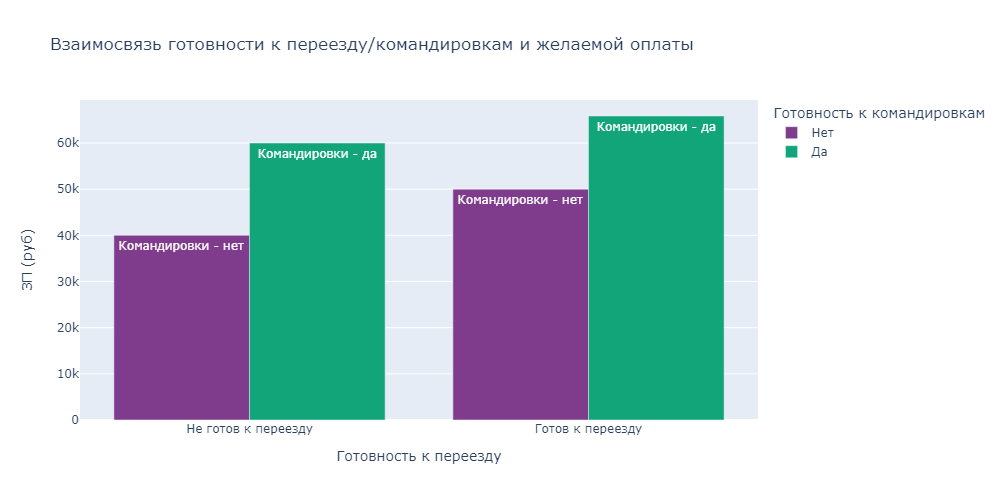

In [524]:
# построим столбчатую диаграмму для анализа взаимосвязи ЗП и готовности к переездам/командировкам
relocation_data = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
relocation_data['Готовность к переезду'] = relocation_data['Готовность к переезду'].apply(lambda x: 'Готов к переезду' if x else 'Не готов к переезду')
relocation_data['Готовность к командировкам'] = relocation_data['Готовность к командировкам'].apply(lambda x: 'Да' if x else 'Нет')

fig = px.bar(
    data_frame=relocation_data,
    x='Готовность к переезду',
    y='ЗП (руб)',
    title='Взаимосвязь готовности к переезду/командировкам и желаемой оплаты',
    color='Готовность к командировкам',
    color_discrete_sequence=px.colors.qualitative.Bold,
    barmode="group",
    text=['Командировки - нет', 'Командировки - да', 'Командировки - нет', 'Командировки - да'],
    width=1000
)
fig.show('png')

Самая высокая желаемая медианная зарплата (66 тыс) у тех, кто готов и на командировки, и на переезд. Т.к. такие кандидаты могут рассматривать большее количество предложений. Кроме того, переезд в крупные города также может способствовать повышению заработной платы.

У тех, кто не готов ни к тому, ни к другому, медианная зарплата самая низкая - 40 тысяч рублей.

Также можно заметить, что готовность к командировкам больше влияет на уровень ЗП, чем готовность к переезду. У готовых к переезду, но не готовых к командировкам медианнная ЗП (50 тысяч) ниже, чем у готовых к командировкам, но не готовых к переезду (60 тыс). 

________________________________________________________________________________________________________________

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

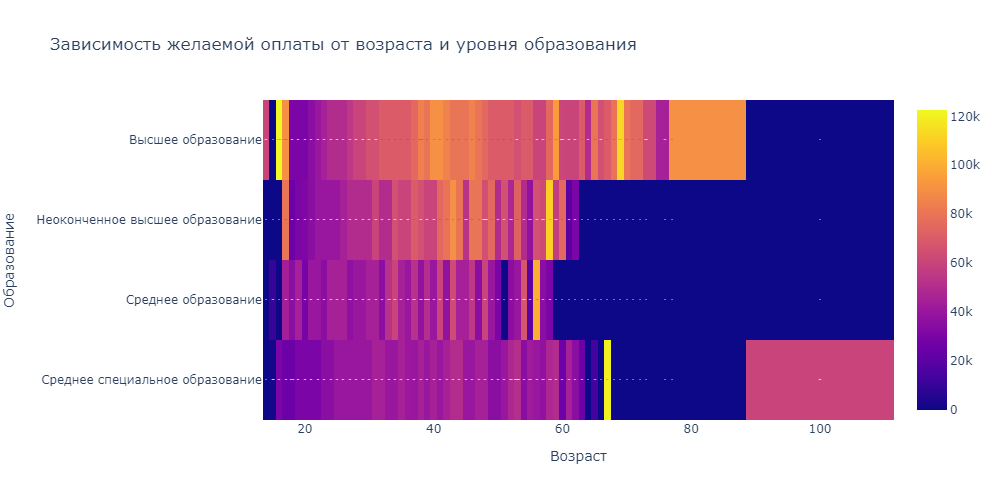

In [521]:
# построим тепловую карту для сравнения ЗП для разных уровней образования
pivot = hh_data.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
).round(2)

fig = px.imshow(
    pivot,
    text_auto=True,
    aspect="auto",
    title='Зависимость желаемой оплаты от возраста и уровня образования',
    width=1000
)
fig.show('png')

Самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая) наблюдается у кандидатов с высшим образованием.

Заметны некоторые выбросы:
* Во всех категориях с приближением к пенсионному возрасту снижается уровень ЗП. Исключением являются только кандидаты с высшим образованием, у которых почти до 90 лет созраняется медианная ЗП около 100 тыс. Нужно проверить кол-во кандидатов в возрасте старше 75 лет, возможно, это 1-2 человека, являющихся выбросами;
* Также, как мы видели раньше, есть кандидат в возрасте 100 лет, который также может являться выбросом;
* Кандидаты младше 20 лет вряд ли могут иметь высшее образование;
* Кандидаты 67-и лет со среднеспециальным образованием и желаемой ЗП в 120 тыс.

Как мы видели ранее, заработные платы кандидатов со средним/среднеспециальным образованием ниже, чем в других группах.

________________________________________________________________________________________________________________

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

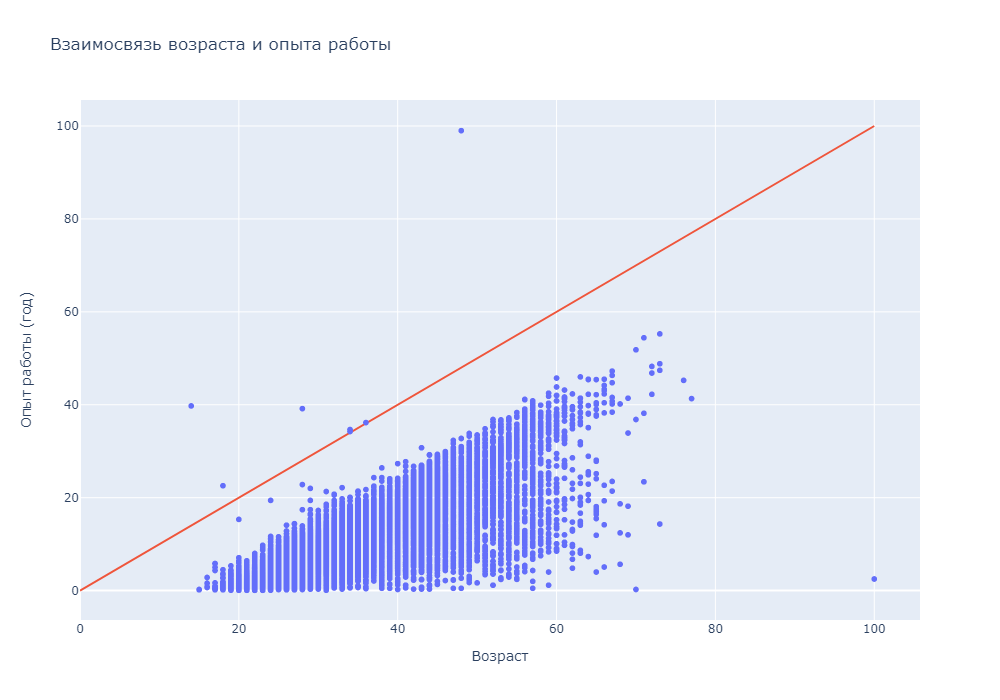

In [522]:
# построим диаграмму рассеяния для анализа взаимосвязи опыта работы и возраста
hh_data['Опыт работы (год)'] = hh_data['Опыт работы (месяц)'].apply(lambda x: round(x/12, 2))
fig = px.scatter(
    data_frame=hh_data, 
    x = 'Возраст',
    y = 'Опыт работы (год)', 
    width=1000,
    height=700,
    title='Взаимосвязь возраста и опыта работы',
    labels = {'Exited_str': 'Лояльность', 'CreditScore': 'Кредитный рейтинг', 'EstimatedSalary': 'Предполагаемая зарплата'}
)
fig.add_scatter(
    x=[0, 100],
    y=[0, 100],
    mode='lines',
    showlegend=False
)
fig.show('png')

На графике видим очевидные выбросы там, где опыт превышает возраст (7 кандидатов). На самом деле выбросами могут быть и другие кандидаты, у которых опыт близок к возрасту: например, сложно представить, что кандидат в возрасте 20 лет имеет опыт 15.3 года, это бы значило, что он работал с 4.7 лет.
100-летний кандидат также похож на выброс.

В целом зависимость похожа на линейную. Но есть много кандидатов с нулевым опытом работы независимо от возраста. Возможно, это связано с тем, что кандидаты меняют сферу деятельности и не указывают опыт в других сферах.

________________________________________________________________________________________________________________

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


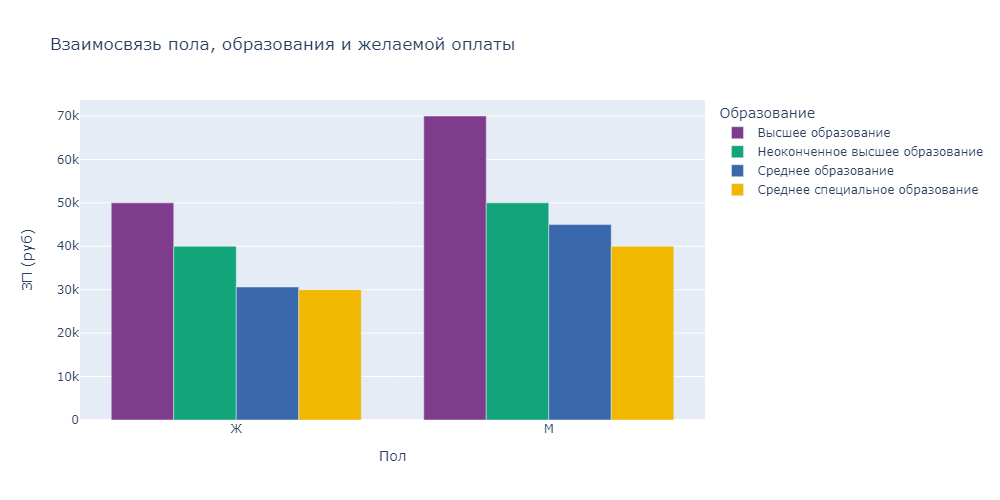

In [525]:
# построим столбчатую диаграмму для анализа взаимосвязи ЗП с полом и образванием кандидатов
gender_data = hh_data.groupby(['Пол', 'Образование'], as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=gender_data,
    x='Пол',
    y='ЗП (руб)',
    title='Взаимосвязь пола, образования и желаемой оплаты',
    color='Образование',
    color_discrete_sequence=px.colors.qualitative.Bold,
    barmode="group",
    labels={},
    width=1000
)
fig.show('png')

На графике видно, что женщины претендуют на более низкие заработные платы, чем мужчины. Даже с одним и тем же уровнем образования. Так медианная ЗП женщин с высшим образованием - 50 тысяч, а у мужчин - 70. 

Возможно это связано с декретными отпусками, более ранним выходом на пенсию. Возможно, женщины не так стремятся к карьерному росту и реже занимают высокие должности.

Пол важен при прогнозировании заработной платы.

________________________________________________________________________________________________________________

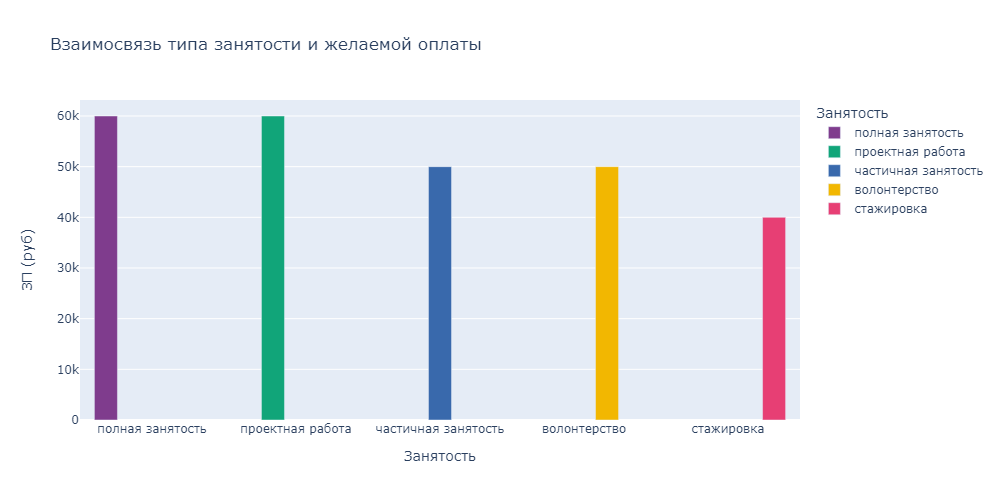

In [526]:
# построим столбчатую диаграмму для анализа взаимосвязи ЗП и вида занятости
columns=['полная занятость', 'проектная работа', 'частичная занятость', 'волонтерство', 'стажировка']
employment_list = [[column, np.median(hh_data[hh_data[column] == True][column] * hh_data[hh_data[column] == True]['ЗП (руб)'])] for column in columns]
employment_data = pd.DataFrame(employment_list, columns=['Занятость', 'ЗП (руб)'])

fig = px.bar(
    data_frame=employment_data,
    x='Занятость',
    y='ЗП (руб)',
    title='Взаимосвязь типа занятости и желаемой оплаты',
    color='Занятость',
    color_discrete_sequence=px.colors.qualitative.Bold,
    barmode="group",
    width=1000
)
fig.show('png')

Самая высокая медианная заработная плата у кандидатов с полной занятостью и проектной работой (60 тыс.рублей).

Самая низкая у кандидатов, рассматривающих стажировку (40 тысяч), что закономерно, т.к. кандидат будет только осваивать специальность.

Неизвестно, что подразумевается под оплачиваемым волонтерством. Возможно, некоторые кандидаты просто автоматически выбрали все возможные виды занятости.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [527]:
# найдем полные дубликаты по всем колонкам
dupl_columns = list(hh_data.columns)
mask = hh_data.duplicated(subset=dupl_columns)
hh_duplicates = hh_data[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

Число найденных дубликатов: 161


In [528]:
# удалим дубликаты 
hh_data = hh_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_data.shape[0]}')

Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [529]:
# найдем признаки с пропусками
cols_null = hh_data.isnull().sum()
cols_with_null = cols_null[cols_null>0].sort_values(ascending=False)
display(cols_with_null)

Опыт работы (месяц)                168
Опыт работы (год)                  168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [530]:
# удалим пропуски в 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность'
# заполним пропуски медианой в 'Опыт работы (месяц)', 'Опыт работы (год)'
hh_data = hh_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], how='any', axis=0)

hh_data = hh_data.fillna({'Опыт работы (месяц)': hh_data['Опыт работы (месяц)'].median()})
hh_data = hh_data.fillna({'Опыт работы (год)': hh_data['Опыт работы (год)'].median()})

print(f'Результирующее число записей: {hh_data.shape[0]}')
print(f'Cреднее значение опыта работы: {round(hh_data["Опыт работы (месяц)"].mean(), 2)}')

Результирующее число записей: 44581
Cреднее значение опыта работы: 114.36


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [531]:
# проверим, много ли строк, где ЗП находится за пределами интервала от 1 тысячи до 1 млн
outliers = hh_data[(hh_data['ЗП (руб)'] > 1000000) | (hh_data['ЗП (руб)'] < 1000)]
print(f'Количество выбросов по ЗП: {outliers.shape[0]}')

Количество выбросов по ЗП: 89


In [532]:
# удалим такие строки
hh_data = hh_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_data.shape[0]}')

Результирующее число записей: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [533]:
# проверим, много ли строк, где опыт больше возраста
outliers = hh_data[(hh_data['Опыт работы (год)'] > hh_data['Возраст'])]
print(f'Количество выбросов по опыту работы: {outliers.shape[0]}')

Количество выбросов по опыту работы: 7


In [534]:
# удалим такие строки
hh_data = hh_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_data.shape[0]}')

Результирующее число записей: 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Ассиметрия распределения: 0.47


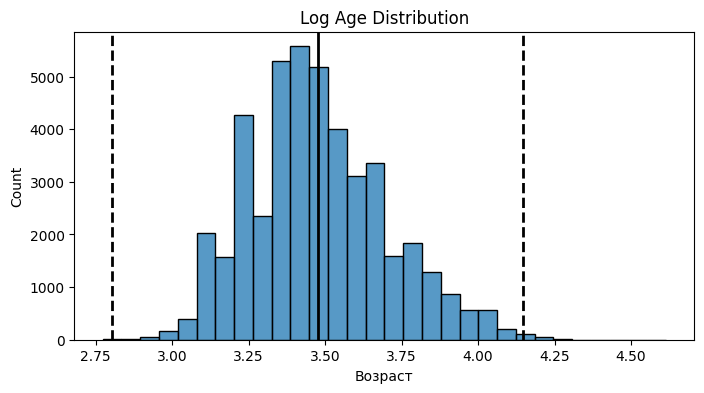

In [535]:
# построим график распределения возраста кандидатов
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Age Distribution')

print(f'Ассиметрия распределения: {round(log_age.skew(), 2)}');

Логарифмическое распределение имеет небольшую правостороннюю ассиметрию. Об этом говорит и показатель ассиметрии (0.47 > 0) 

In [536]:
# функция для поиска выбросов z-методом
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    """
    Функция оценивает выбросы методом z-отклонений

    Args:
        data ([pd.DataFrame]): Входные данные;
        feature ([int, float]): Анализируемый признак;
        log_scale (bool): Признак использования логарифмического масштаба, по-умолчанию False;
        left (int): Количество стандартных отклонений влево;
        right (int): Количество стандартных отклонений вправо;

    Returns:
        ([pd.DataFrame], [pd.DataFrame]): DataFrame с выбросами (outliers) и DataFrame без выбросов (cleaned)
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# применим функцию к возрасту
outliers, cleaned = outliers_z_score(hh_data, 'Возраст', log_scale=True, left=3, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

display(outliers)

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (год)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,Среднее образование,М,15,2.0,Санкт-Петербург,...,False,False,False,False,True,True,True,False,10000.0,0.17
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,Среднее специальное образование,М,15,3.0,другие,...,False,False,False,True,False,False,False,False,2000.0,0.25
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное образование,М,100,30.0,Санкт-Петербург,...,True,False,True,True,False,True,True,False,60000.0,2.50


В выбросы попали кандидаты в возрасте 15 и 100 лет.

In [537]:
hh_data.to_csv('hh_database_cleaned.csv')